# Midterm Question 2 Analysis 1

In [37]:
import requests                          # Lib to handle http request and fetch data
import json                              # Lib to handle json function
import glob                              # Lib to handle folders and open files
from bs4 import BeautifulSoup as BS
import csv                               # Lib to work on CSV
from dateutil.parser import parse        # Lib to handle date and parse it as per need
import datetime                          # Lib to handle date fields in python
import matplotlib.pyplot as plt          # Lib to plot grapbh,bar and pie chart in python

In [ ]:
#Code to fetch data from Artical Search , Artical Archieved and Most Popular APT
nyt_api = 'https://api.nytimes.com/svc/search/v2/articlesearch.json'
#auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
auth_key = '7a3f07017a9f40c6b9de8bca324f455b'
q='food'
begin_date = '19900101'               #change date to 20000101 
end_date = '19991231'                 #Change date to 20151231
date = 'begin_date=' + begin_date + '&' + 'end_date=' + end_date + '&'
page = 0                              #Maximum limit for pagination
pages=120

for i in range(0, pages):              # For loop to generated multiple pages
    page = i
    #url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+date+'page='+str(page)
    url=nyt_api+'?'+'apikey='+ auth_key+'&'+'q='+q+'&'+'page='+str(page)
    response = requests.get(url)
    json.dump(response.json(), open("midterm/data/food"+str(page)+".json",'w'))

#Most Popular API data fetching
auth_key = 'f85654e3fc17475aa6d7f20a4687434f'
nyt_api = 'https://api.nytimes.com/svc/mostpopular/v2/mostviewed/food/30.json'
url=nyt_api+'?'+'apikey='+ auth_key
response = requests.get(url)
json.dump(response.json(), open("midterm/data/foodM.json",'w'))

In [2]:
food_file_list = glob.glob('midterm\\data\\food\\*.json')            # Accessing all food related artical stored 
food_details = []
#print(food_file_list)

for f in food_file_list:                                            # Extracting useful information from artical like articalID,
    print("processing "+f)                                          #Content, date published and section
    with open(f) as json_file:
        data=json.load(json_file)
        temp = len(data["response"]['docs'])
        for i in range(temp):
            ID = data["response"]['docs'][i]['_id']
            snippet = data["response"]['docs'][i]['snippet']
            section_name = data["response"]['docs'][i]['section_name']
            word_count =  data["response"]['docs'][i]['word_count']
            pub_date = parse(data["response"]['docs'][i]['pub_date'])
            myDate =(pub_date.strftime('%Y/%m/%d'))
            food_details.append([ID,snippet,section_name,word_count,myDate])

file = open('midterm\\data\\food\\foodDetails.csv','w',newline='',encoding='utf-8')   # code to write list into CSV for ref.
writer =csv.writer(file)
writer.writerow(["ID","snippet","section_name","word_count","myDate"])
for x in food_details:
    writer.writerow(x)

processing midterm\data\food\food0.json
processing midterm\data\food\food3.json
processing midterm\data\food\food4.json
processing midterm\data\food\food4M101.json
processing midterm\data\food\food4M103.json
processing midterm\data\food\food4M105.json
processing midterm\data\food\food4M107.json
processing midterm\data\food\food4M108.json
processing midterm\data\food\food4M110.json
processing midterm\data\food\food4M111.json
processing midterm\data\food\food4M112.json
processing midterm\data\food\food4M113.json
processing midterm\data\food\food4M114.json
processing midterm\data\food\food4M115.json
processing midterm\data\food\food4M116.json
processing midterm\data\food\food4M118.json
processing midterm\data\food\food4M120.json
processing midterm\data\food\food4M20.json
processing midterm\data\food\food4M21.json
processing midterm\data\food\food4M22.json
processing midterm\data\food\food4M23.json
processing midterm\data\food\food4M24.json
processing midterm\data\food\food4M26.json
proces

{'1991': 53, '1990': 62, '2010': 41, '2002': 71, '2009': 32, '2014': 10, '1992': 90, '2006': 62, '2015': 21, '1993': 96, '1999': 37, '1994': 68, '2008': 38, '1995': 45, '2005': 14, '2003': 76, '2012': 15, '2001': 44, '2004': 49, '2011': 19, '2007': 36, '2013': 19, '1998': 66, '1996': 93, '2000': 43, '1997': 100}


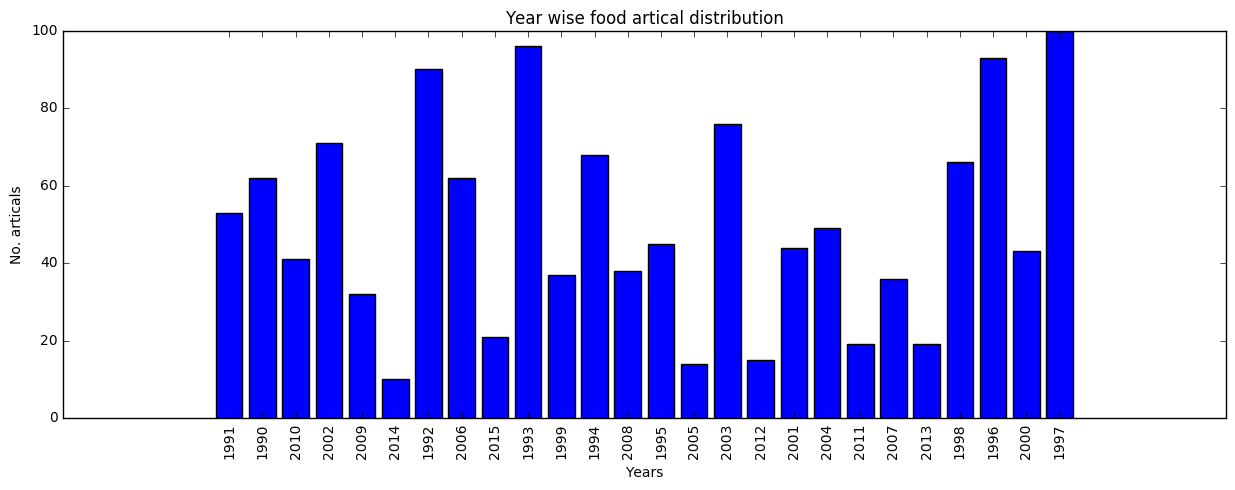

In [38]:
#year wise food artical distribution

food_year = {}                                 # Dict. to store formated food details and unique count
#print(len(food_details))
for f in food_details:
    #print(f[4])
    year =f[4]
    t1 = parse(year)
    year=t1.strftime('%Y')                    # date parsing to get only year
    if year not in food_year:
        food_year[year]=1
    else:
        food_year[year]=food_year[year]+1
print(food_year)

from pylab import rcParams                       # Bar graph to display no. of artical published by NYT year wise
rcParams['figure.figsize'] = 15, 5
plt.xlabel("Years")
plt.ylabel("No. articals")
plt.title('Year wise food artical distribution')
plt.bar(range(len(food_year)), food_year.values(), align='center')
plt.xticks(range(len(food_year)), list(food_year.keys()),rotation='vertical')
plt.show()

In [49]:
food_section ={}                                # dic and list store food section relate data
master_list =[]

for f in food_details:
    #print(f[4])
    section =f[2]
    try:
        temp_list = section.split(';')           # Section are multiple for few artical considering those situations
    except:
        print('One field as weird value')        # few artical do not have required fields handling them thru exception
    for s in temp_list:
        master_list.append(s)
for m in master_list:
    if m not in food_section:
        food_section[m]=1
    else:
        food_section[m]=food_section[m]+1
print(food_section) 


One field as weird value
One field as weird value
One field as weird value
One field as weird value
One field as weird value
One field as weird value
One field as weird value
{'N.Y. / Region': 41, 'Dining & Wine': 17, 'Business Day': 19, 'Style': 14, 'U.S.': 7, 'Technology': 6, ' Style': 204, 'World': 28, 'Fashion & Style': 1, ' Books': 27, ' Home and Garden': 1, 'Multimedia/Photos': 4, 'Magazine': 261, ' Arts': 7, ' U.S.': 2, 'Week in Review': 3, 'T Magazine': 7, 'Home and Garden': 171, 'Front Page': 1, 'Health': 10, 'Washington': 2, ' New York and Region': 7, 'Opinion': 19, 'UrbanEye': 2, 'Food': 40, ' Dining and Wine': 27, 'Travel': 6, 'Books': 1, 'Theater': 1, 'Arts': 39, 'Dining and Wine': 198, 'Real Estate': 2, ' Theater': 6, 'false': 1, ' Science': 1, ' Magazine': 4, 'New York and Region': 373, 'Science': 5, 'Movies': 8, 'Corrections': 6, ' Opinion': 17, 'Giving': 1, 'Business': 6, ' Health': 2}


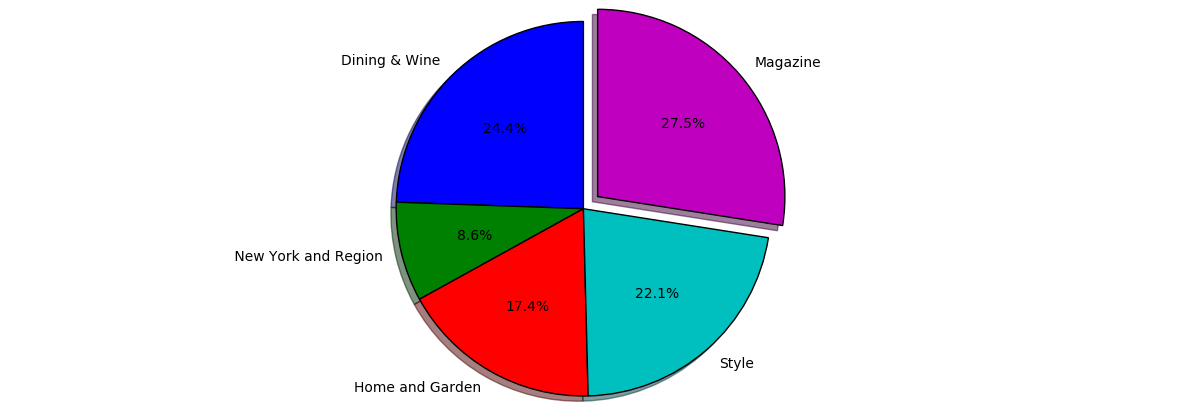

In [60]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Dining & Wine', ' New York and Region', 'Home and Garden', 'Style', 'Magazine'
sizes = [242, 85, 172, 219,272]
explode = (0, 0, 0, 0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()